<a href="https://colab.research.google.com/github/sadullahozcan/sarcopenia-eda-analysis-2/blob/main/EDA_07_lin_reg_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [ ]:
from google import colab
colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/PROJECTS/Sarcopenia_Project/Data_Set_Files_2/sarcopenia-data-set_columns_corrected_9.xlsx', index_col= 0)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2', 'OP',
       'Total_Duration_of_Chronic_Diseases', 'Education', 'Chronic_Diseases',
       'Number_of_Drug_Used', 'Job', 'Total_Number_of_Chronic_Diseases',
       'Work_Status', 'Exercise_Status', 'AT', 'CST', 'Gait_Speed', 'Grip_Str',
       'STAR', 'Waist_Hip_Ratio', 'BMI', 'Sarcopenia'],
      dtype='object')

# **Final Arrangements on data frame**

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Age_Group,0
Weight,0
DM_Type2,0
OP,0
Total_Duration_of_Chronic_Diseases,0
Education,0
Chronic_Diseases,1738
Number_of_Drug_Used,0


In [ ]:
df["Chronic_Diseases"] = df["Chronic_Diseases"].fillna("No_Disease")

In [ ]:
df.Chronic_Diseases.value_counts()

,count
Chronic_Diseases,
No_Disease,1738
OP,672
DM_Type2,380
Hipotiroidi,258
"DM_Type2,OP",177
...,...
"KAH, Hipotiroidi, Asthma",1
"Dyslipidemia, COPD,OP",1
"DM_Type2, Dyslipidemia, KAH, COPD,OP",1


In [ ]:
df["Job"] = df["Job"].fillna("no_job")

In [ ]:
df.Job.value_counts()

,count
Job,
housewife,2256
worker,432
public officer,315
retired or not working,307
no_job,225
...,...
babysitter,1
modelist,1
general store,1


In [ ]:
df["Job"] = df["Job"].replace("retired or not working", "retired")

In [ ]:
df["Job"] = df["Job"].replace(["cleaning worker", "unknown", "construction worker","waiter"], "worker")

In [ ]:
job_counts = df['Job'].value_counts()

low_count_jobs = job_counts[job_counts < 10].index

df['Job'] = df['Job'].replace(low_count_jobs, 'numbers_below_ten')

print(df['Job'].value_counts())

Job
housewife               2256
worker                   536
retired                  470
public officer           315
numbers_below_ten        271
no_job                   225
teacher                  159
health care personel     124
driver                    76
farmer                    59
secretary                 54
technician                53
engineer                  53
businessman               46
policeman                 38
tailor                    33
military personel         31
cook                      31
accountant                30
bank clerk                23
self-employment           23
manager                   22
doctor                    19
caregiver                 14
hairdresser               14
artisan                   11
security guard            10
salesman                  10
pressman                  10
Name: count, dtype: int64


In [ ]:
df.Job.value_counts()

,count
Job,
housewife,2256
worker,536
retired,470
public officer,315
numbers_below_ten,271
no_job,225
teacher,159
health care personel,124
driver,76


In [ ]:
df["Job"] = df["Job"].replace(["salesman", "artisan", "hairdresser","cook","tailor","accountant","caregiver"], "self-employment")

In [ ]:
df["Job"] = df["Job"].replace(["security guard","military personel","policeman"], "security_personel")

In [ ]:
df["Job"] = df["Job"].replace("doctor", "health care personel")

In [ ]:
job_counts2 = df['Job'].value_counts()

low_count_jobs2 = job_counts2[job_counts2 < 55].index

df['Job'] = df['Job'].replace(low_count_jobs2, 'white_collar_below_55')

print(df['Job'].value_counts())

Job
housewife                2256
worker                    536
retired                   470
public officer            315
numbers_below_ten         271
white_collar_below_55     261
no_job                    225
self-employment           166
teacher                   159
health care personel      143
security_personel          79
driver                     76
farmer                     59
Name: count, dtype: int64


In [ ]:
df.to_excel('/content/drive/MyDrive/PROJECTS/Sarcopenia_Project/Data_Set_Files_2/sarcopenia-data-set_columns_corrected_9_2.xlsx', index=False)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/PROJECTS/Sarcopenia_Project/Data_Set_Files_2/sarcopenia-data-set_columns_corrected_9_2.xlsx')

In [ ]:
df.columns

Index(['Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2', 'OP',
       'Total_Duration_of_Chronic_Diseases', 'Education', 'Chronic_Diseases',
       'Number_of_Drug_Used', 'Job', 'Total_Number_of_Chronic_Diseases',
       'Work_Status', 'Exercise_Status', 'AT', 'CST', 'Gait_Speed', 'Grip_Str',
       'STAR', 'Waist_Hip_Ratio', 'BMI', 'Sarcopenia'],
      dtype='object')

# **Linear Regression Analyses**

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Age_Group,0
Weight,0
DM_Type2,0
OP,0
Total_Duration_of_Chronic_Diseases,0
Education,0
Chronic_Diseases,0
Number_of_Drug_Used,0


In [ ]:
df.head()

,Gender,Age,Age_Group,Weight,DM_Type2,OP,Total_Duration_of_Chronic_Diseases,Education,Chronic_Diseases,Number_of_Drug_Used,...,Work_Status,Exercise_Status,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,Sarcopenia
0,M,74.0,AGE 60-80,88.0,1,1,5.0,University,"DM_Type2, KAH,OP",3,...,not working,3-4/week,50.2,12.5,1.21,32.0,1.81,1.00,27.8,0
1,M,62.0,AGE 60-80,105.0,0,0,0.0,Secondary School,No_Disease,0,...,not working,0,49.0,12.1,1.42,47.0,1.38,1.12,35.5,1
2,M,65.0,AGE 60-80,89.0,0,0,0.0,University,No_Disease,0,...,not working,3-4/week,37.3,8.7,1.18,33.0,1.20,0.96,31.2,0
3,F,71.0,AGE 60-80,68.0,0,1,12.0,University,"Asthma,OP",1,...,not working,1-2/week,29.5,8.3,1.23,25.0,1.11,1.03,26.6,0
4,F,61.0,AGE 60-80,80.0,0,0,1.5,University,Asthma,1,...,not working,1-2/week,39.5,11.0,1.31,31.0,1.26,0.97,31.3,0


**Lets drop the columns at first sight that we don't want to include the lineer regression analysis.**

In [ ]:
df_lineer = df.copy()

In [ ]:
df_lineer = df_lineer.drop(["Age_Group"], axis=1)

In [ ]:
df_lineer.columns

Index(['Gender', 'Age', 'Weight', 'DM_Type2', 'OP',
       'Total_Duration_of_Chronic_Diseases', 'Education', 'Chronic_Diseases',
       'Number_of_Drug_Used', 'Job', 'Total_Number_of_Chronic_Diseases',
       'Work_Status', 'Exercise_Status', 'AT', 'CST', 'Gait_Speed', 'Grip_Str',
       'STAR', 'Waist_Hip_Ratio', 'BMI', 'Sarcopenia'],
      dtype='object')

**Summary Statistics and Data Completeness**

In [ ]:
# Lets check the Summary Statistics and Data Completeness before Lineer Regression
summary_df_lineer = pd.DataFrame(columns=['Variable', 'Type', 'Mean/Mode', 'Std Dev/Freq', 'Min/Category', 'Max/% Missing'])

for col in df_lineer.columns:
    variable_name = col
    data_type = str(df_lineer[col].dtype)

    # Değişken tipini belirle
    if pd.api.types.is_numeric_dtype(df_lineer[col]):
        if df_lineer[col].nunique() <= 2 and df_lineer[col].dropna().isin([0, 1]).all(): # Binary kontrolü
            var_type = 'Binary'
        else:
            var_type = 'Numerical'
        mean_mode = round(df_lineer[col].mean(), 2)
        std_dev_freq = round(df_lineer[col].std(), 2)
        min_category = df_lineer[col].min()
        max_missing = f"{df_lineer[col].max()} / {round(df_lineer[col].isnull().sum() / len(df_lineer) * 100, 2)}%"
    else: # Kategorik veya Nesne (string)
        var_type = 'Categorical'
        if df_lineer[col].nunique() <= 2 and df_lineer[col].dropna().isin([0, 1]).all():
            var_type = 'Binary' # Bazı binary değişkenler object olarak okunabilir
            mean_mode = round(df_lineer[col].mode()[0], 2) if not df_lineer[col].mode().empty else 'N/A'
            std_dev_freq = 'N/A' # Binary için Std Dev anlamlı değil
            min_category = df_lineer[col].min()
            max_missing = f"{df_lineer[col].max()} / {round(df_lineer[col].isnull().sum() / len(df_lineer) * 100, 2)}%"
        else:
            var_type = 'Categorical'
            mean_mode = df_lineer[col].mode()[0] if not df_lineer[col].mode().empty else 'N/A'
            # Frekans hesaplama (en sık geçen kategorinin yüzdesi)
            value_counts = df_lineer[col].value_counts(normalize=True) * 100
            std_dev_freq = f"{round(value_counts.max(), 2)}%" if not value_counts.empty else 'N/A'
            # En az geçen kategori veya ilk kategori
            min_category = df_lineer[col].value_counts().index[-1] if not df_lineer[col].value_counts().empty else 'N/A'
            max_missing = f"{round(df_lineer[col].isnull().sum() / len(df_lineer) * 100, 2)}%"


    # Yeni satırı DataFrame'e ekle
    summary_df_lineer.loc[len(summary_df_lineer)] = [
        variable_name,
        var_type,
        mean_mode,
        std_dev_freq,
        min_category,
        max_missing
    ]

# Tabloyu görüntüle
print("Table 1: Summary Statistics and Data Completeness")
print(summary_df_lineer.to_string(index=False))

Table 1: Summary Statistics and Data Completeness
                          Variable        Type      Mean/Mode Std Dev/Freq                            Min/Category Max/% Missing
                            Gender Categorical              F       72.51%                                       M          0.0%
                               Age   Numerical          61.99         9.69                                    42.0   91.5 / 0.0%
                            Weight   Numerical           76.5        13.44                                    40.0  112.0 / 0.0%
                          DM_Type2      Binary            0.3         0.46                                       0      1 / 0.0%
                                OP      Binary           0.33         0.47                                       0      1 / 0.0%
Total_Duration_of_Chronic_Diseases   Numerical           5.27         6.43                                     0.0   25.0 / 0.0%
                         Education Categorical 

In [ ]:
summary_df_lineer

,Variable,Type,Mean/Mode,Std Dev/Freq,Min/Category,Max/% Missing
0,Gender,Categorical,F,72.51%,M,0.0%
1,Age,Numerical,61.99,9.69,42.0,91.5 / 0.0%
2,Weight,Numerical,76.5,13.44,40.0,112.0 / 0.0%
3,DM_Type2,Binary,0.3,0.46,0,1 / 0.0%
4,OP,Binary,0.33,0.47,0,1 / 0.0%
5,Total_Duration_of_Chronic_Diseases,Numerical,5.27,6.43,0.0,25.0 / 0.0%
6,Education,Categorical,Primary School,44.08%,Secondary School,0.0%
7,Chronic_Diseases,Categorical,No_Disease,34.65%,"Dyslipidemia, Hipotiroidi, Asthma, COPD",0.0%
8,Number_of_Drug_Used,Numerical,1.09,1.19,0,5 / 0.0%
9,Job,Categorical,housewife,44.98%,farmer,0.0%


**Nominal categorical variables (Chronic_Diseases, Education, Job, Work_Status, Exercise_Status) were one-hot encoded for regression.**

In [ ]:
#Encode categorical variables
df_lineer = pd.get_dummies(df_lineer, drop_first=True)

In [ ]:
df_lineer.head()

,Age,Weight,DM_Type2,OP,Total_Duration_of_Chronic_Diseases,Number_of_Drug_Used,Total_Number_of_Chronic_Diseases,AT,CST,Gait_Speed,...,Job_retired,Job_security_personel,Job_self-employment,Job_teacher,Job_white_collar_below_55,Job_worker,Work_Status_unknown,Work_Status_working,Exercise_Status_1-2/week,Exercise_Status_3-4/week
0,74.0,88.0,1,1,5.0,3,3,50.2,12.5,1.21,...,False,False,False,False,False,False,False,False,False,True
1,62.0,105.0,0,0,0.0,0,0,49.0,12.1,1.42,...,False,False,False,False,False,False,False,False,False,False
2,65.0,89.0,0,0,0.0,0,0,37.3,8.7,1.18,...,False,True,False,False,False,False,False,False,False,True
3,71.0,68.0,0,1,12.0,1,4,29.5,8.3,1.23,...,False,False,False,False,True,False,False,False,True,False
4,61.0,80.0,0,0,1.5,1,3,39.5,11.0,1.31,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
df_lineer.columns

Index(['Age', 'Weight', 'DM_Type2', 'OP', 'Total_Duration_of_Chronic_Diseases',
       'Number_of_Drug_Used', 'Total_Number_of_Chronic_Diseases', 'AT', 'CST',
       'Gait_Speed',
       ...
       'Job_retired', 'Job_security_personel', 'Job_self-employment',
       'Job_teacher', 'Job_white_collar_below_55', 'Job_worker',
       'Work_Status_unknown', 'Work_Status_working',
       'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week'],
      dtype='object', length=142)

In [ ]:
df_lineer.columns.to_list()

['Age',
 'Weight',
 'DM_Type2',
 'OP',
 'Total_Duration_of_Chronic_Diseases',
 'Number_of_Drug_Used',
 'Total_Number_of_Chronic_Diseases',
 'AT',
 'CST',
 'Gait_Speed',
 'Grip_Str',
 'STAR',
 'Waist_Hip_Ratio',
 'BMI',
 'Sarcopenia',
 'Gender_M',
 'Education_Primary School',
 'Education_Secondary School',
 'Education_University',
 'Education_illiterate',
 'Chronic_Diseases_Asthma,OP',
 'Chronic_Diseases_COPD',
 'Chronic_Diseases_COPD,OP',
 'Chronic_Diseases_DM_Type2',
 'Chronic_Diseases_DM_Type2, Asthma',
 'Chronic_Diseases_DM_Type2, Asthma, COPD,OP',
 'Chronic_Diseases_DM_Type2, Asthma,OP',
 'Chronic_Diseases_DM_Type2, COPD',
 'Chronic_Diseases_DM_Type2, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Asthma',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, COPD',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi',
 'Chronic_Disea

**Only one type of chronic diseases are kept to see each one of diseases' impacts on Sarcopenia.**

In [ ]:
df_lineer = df_lineer.drop(['Chronic_Diseases_Asthma,OP',
 'Chronic_Diseases_COPD,OP',
 'Chronic_Diseases_DM_Type2',
 'Chronic_Diseases_DM_Type2, Asthma',
 'Chronic_Diseases_DM_Type2, Asthma, COPD,OP',
 'Chronic_Diseases_DM_Type2, Asthma,OP',
 'Chronic_Diseases_DM_Type2, COPD',
 'Chronic_Diseases_DM_Type2, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Asthma',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, COPD',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi, Asthma',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi, COPD',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia,OP',
 'Chronic_Diseases_DM_Type2, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Hipotiroidi, Asthma',
 'Chronic_Diseases_DM_Type2, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Hipotiroidi, COPD',
 'Chronic_Diseases_DM_Type2, Hipotiroidi,OP',
  'Chronic_Diseases_DM_Type2, Insulin',
 'Chronic_Diseases_DM_Type2, Insulin, Asthma',
 'Chronic_Diseases_DM_Type2, Insulin, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Asthma',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH, Hipotiroidi, Asthma',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Insulin, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, Asthma',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, COPD',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, COPD,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH,OP',
 'Chronic_Diseases_DM_Type2, Insulin,OP',
 'Chronic_Diseases_DM_Type2, KAH',
 'Chronic_Diseases_DM_Type2, KAH, Asthma,OP',
 'Chronic_Diseases_DM_Type2, KAH, COPD',
 'Chronic_Diseases_DM_Type2, KAH, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, KAH,OP',
 'Chronic_Diseases_DM_Type2,OP',
 'Chronic_Diseases_Dyslipidemia, Asthma',
 'Chronic_Diseases_Dyslipidemia, Asthma,OP',
 'Chronic_Diseases_Dyslipidemia, COPD',
 'Chronic_Diseases_Dyslipidemia, COPD,OP',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi, Asthma, COPD',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi, COPD,OP',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi,OP',
 'Chronic_Diseases_Dyslipidemia, KAH',
 'Chronic_Diseases_Dyslipidemia, KAH, Asthma',
 'Chronic_Diseases_Dyslipidemia, KAH, Asthma,OP',
 'Chronic_Diseases_Dyslipidemia, KAH, COPD',
 'Chronic_Diseases_Dyslipidemia, KAH, COPD,OP',
 'Chronic_Diseases_Dyslipidemia, KAH, Hipotiroidi',
 'Chronic_Diseases_Dyslipidemia, KAH, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_Dyslipidemia, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_Dyslipidemia, KAH,OP',
 'Chronic_Diseases_Dyslipidemia,OP',
 'Chronic_Diseases_Hipotiroidi, Asthma',
 'Chronic_Diseases_Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_Hipotiroidi, COPD',
 'Chronic_Diseases_Hipotiroidi, COPD,OP',
 'Chronic_Diseases_Hipotiroidi,OP',
 'Chronic_Diseases_KAH, Asthma',
 'Chronic_Diseases_KAH, Asthma, COPD,OP',
 'Chronic_Diseases_KAH, Asthma,OP',
 'Chronic_Diseases_KAH, COPD',
 'Chronic_Diseases_KAH, COPD,OP',
 'Chronic_Diseases_KAH, Hipotiroidi',
 'Chronic_Diseases_KAH, Hipotiroidi, Asthma',
 'Chronic_Diseases_KAH, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_KAH, Hipotiroidi,OP',
 'Chronic_Diseases_KAH,OP',
 'Chronic_Diseases_OP','Chronic_Diseases_No_Disease'],axis=1)

In [ ]:
df_lineer.columns

Index(['Age', 'Weight', 'DM_Type2', 'OP', 'Total_Duration_of_Chronic_Diseases',
       'Number_of_Drug_Used', 'Total_Number_of_Chronic_Diseases', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia', 'Gender_M', 'Education_Primary School',
       'Education_Secondary School', 'Education_University',
       'Education_illiterate', 'Chronic_Diseases_COPD',
       'Chronic_Diseases_Dyslipidemia', 'Chronic_Diseases_Hipotiroidi',
       'Chronic_Diseases_KAH', 'Job_farmer', 'Job_health care personel',
       'Job_housewife', 'Job_no_job', 'Job_numbers_below_ten',
       'Job_public officer', 'Job_retired', 'Job_security_personel',
       'Job_self-employment', 'Job_teacher', 'Job_white_collar_below_55',
       'Job_worker', 'Work_Status_unknown', 'Work_Status_working',
       'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week'],
      dtype='object')

In [ ]:
df_lineer.dtypes

,0
Age,float64
Weight,float64
DM_Type2,int64
OP,int64
Total_Duration_of_Chronic_Diseases,float64
Number_of_Drug_Used,int64
Total_Number_of_Chronic_Diseases,int64
AT,float64
CST,float64
Gait_Speed,float64


**For numerical independent variables, scaling (standardization or normalization) was considered.**

In [ ]:
df_lineer ['Sarcopenia'] = df_lineer['Sarcopenia'].astype('category')

In [ ]:
numeric_cols = df_lineer.select_dtypes(include=['number']).columns.tolist()
cat_cols = df_lineer.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Columns:")
print(numeric_cols)
print("\nCategorical Columns:")
print(cat_cols)

Numeric Columns:
['Age', 'Weight', 'DM_Type2', 'OP', 'Total_Duration_of_Chronic_Diseases', 'Number_of_Drug_Used', 'Total_Number_of_Chronic_Diseases', 'AT', 'CST', 'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI']

Categorical Columns:
['Sarcopenia']


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df_lineer[numeric_cols])

def get_features_and_target_arrays(df_lineer, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df_lineer[numeric_cols])
    X_categorical = df_lineer[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df_lineer['Sarcopenia']
    return X, y

X, y = get_features_and_target_arrays(df_lineer, numeric_cols, cat_cols, scaler)

**The correlation between numerical variables**

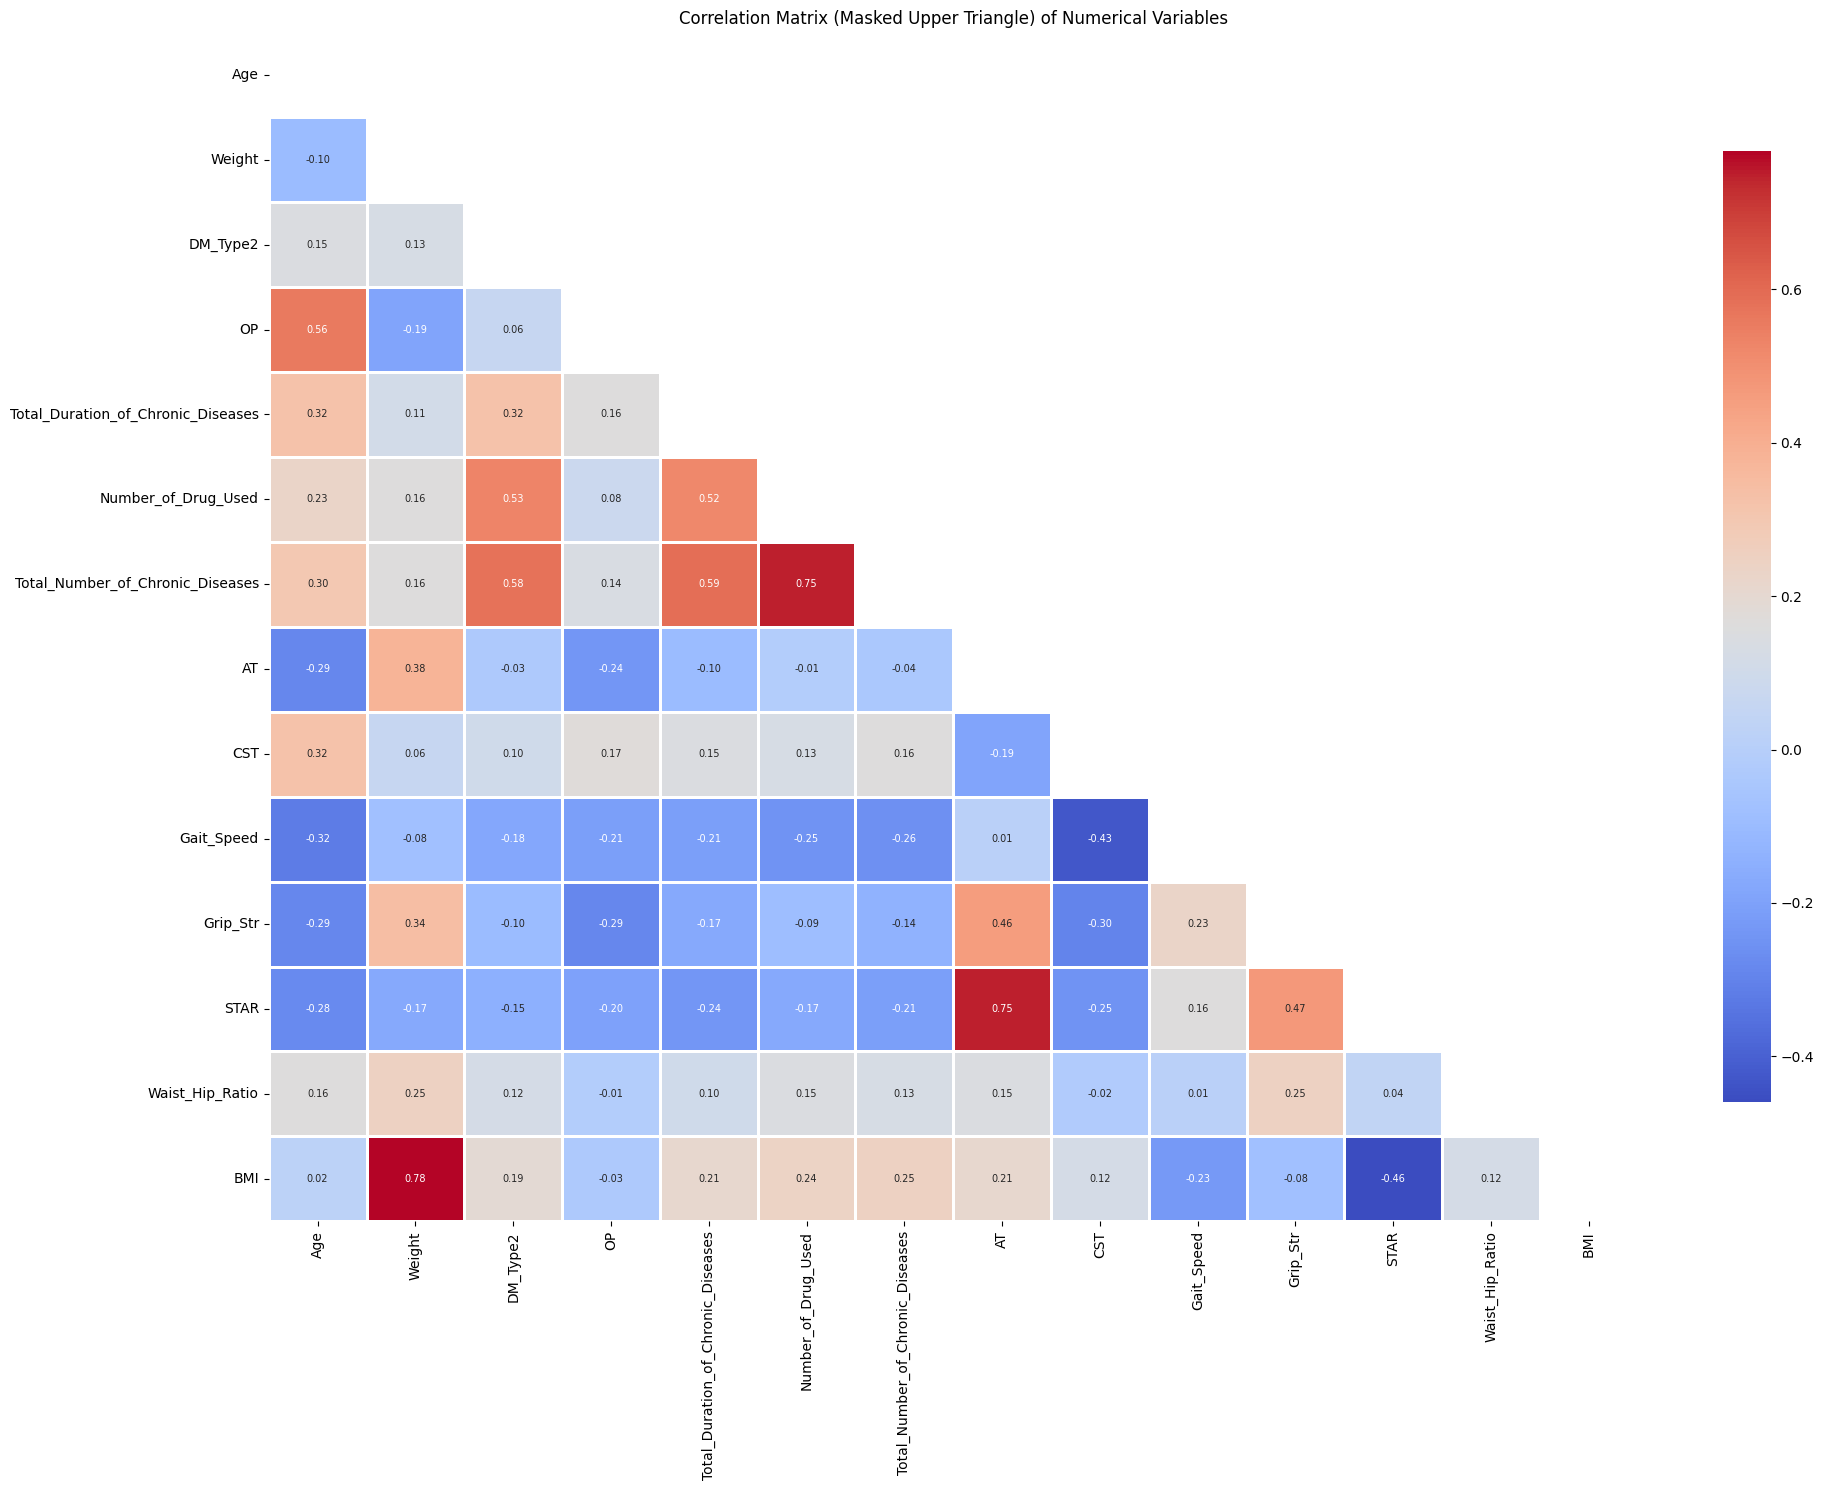

In [ ]:
df_numeric = df_lineer.select_dtypes(include=np.number)
correlation_matrix = df_numeric.corr().round(2)

num_cols = len(df_numeric.columns)

fig_width = num_cols * 0.7
fig_height = num_cols * 0.7

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Create a mask for the upper triangle


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f",linewidths=1,cbar_kws={'shrink': 0.8},
    annot_kws={"fontsize": 7})
plt.title('Correlation Matrix (Masked Upper Triangle) of Numerical Variables')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# 1. Calculate the correlation matrix
correlation_matrix = df_lineer.corr()

# 2. Look for highly correlated variables
# Define your correlation threshold
threshold = 0.45 # Adjust this value as needed

high_correlation_pairs = []

# Iterate through the correlation matrix
# We iterate only the upper triangle to avoid duplicates and self-correlation
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.loc[col1, col2]

        if abs(correlation_value) >= threshold:
            high_correlation_pairs.append((col1, col2, correlation_value))

print("\nVariables with very high correlation (absolute value >= {}):".format(threshold))
if high_correlation_pairs:
    for col1, col2, corr_value in high_correlation_pairs:
        print(f"  - {col1} and {col2}: {corr_value:.4f}")
else:
    print("  No highly correlated variable pairs found at this threshold.")


Variables with very high correlation (absolute value >= 0.45):
  - Age and OP: 0.5603
  - Weight and BMI: 0.7814
  - DM_Type2 and Number_of_Drug_Used: 0.5278
  - DM_Type2 and Total_Number_of_Chronic_Diseases: 0.5771
  - Total_Duration_of_Chronic_Diseases and Number_of_Drug_Used: 0.5215
  - Total_Duration_of_Chronic_Diseases and Total_Number_of_Chronic_Diseases: 0.5878
  - Number_of_Drug_Used and Total_Number_of_Chronic_Diseases: 0.7511
  - AT and Grip_Str: 0.4622
  - AT and STAR: 0.7491
  - Grip_Str and STAR: 0.4686
  - Grip_Str and Gender_M: 0.6787
  - STAR and BMI: -0.4590
  - STAR and Sarcopenia: -0.4625
  - Gender_M and Job_housewife: -0.5423
  - Job_no_job and Work_Status_unknown: 0.6135


The correlation matrix reveals a very strong positive correlation between Weight and BMI (0.78), which is expected given BMI is derived from weight and height. This high correlation indicates a potential multicollinearity issue if both are included as independent variables. Other notable correlations include:
  - Age and OP: 0.5603
  - DM_Type2 and Total_Number_of_Chronic_Diseases: 0.5211
  - DM_Type2 and Number_of_Drug_Used: 0.5278
  - Total_Number_of_Chronic_Diseases and Total_Duration_of_Chronic_Diseases: 0.5686
  - Total_Number_of_Chronic_Diseases and Number_of_Drug_Used: 0.6912
  - Total_Duration_of_Chronic_Diseases and Number_of_Drug_Used: 0.5215
  - AT and Grip_Str: 0.4622
  - AT and STAR: 0.7491
  - Grip_Str and STAR: 0.4686
  - Grip_Str and Gender_M: 0.6787
  - STAR and BMI: -0.4590
  - STAR and Sarcopenia: -0.4625
  - Gender_M and Job_housewife: -0.5423

These relationships will be further investigated using VIF scores during model fitting to ensure the stability and interpretability of coefficients.

Some of the columns were dropped after careful consideration of multicollinearity from correlation matrix.

In [ ]:
df_lineer = df_lineer.drop(['Number_of_Drug_Used', 'Total_Number_of_Chronic_Diseases', 'Gender_M'], axis=1)

In [ ]:
df_lineer.columns

Index(['Age', 'Weight', 'DM_Type2', 'OP', 'Total_Duration_of_Chronic_Diseases',
       'AT', 'CST', 'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia', 'Education_Primary School', 'Education_Secondary School',
       'Education_University', 'Education_illiterate', 'Chronic_Diseases_COPD',
       'Chronic_Diseases_Dyslipidemia', 'Chronic_Diseases_Hipotiroidi',
       'Chronic_Diseases_KAH', 'Job_farmer', 'Job_health care personel',
       'Job_housewife', 'Job_no_job', 'Job_numbers_below_ten',
       'Job_public officer', 'Job_retired', 'Job_security_personel',
       'Job_self-employment', 'Job_teacher', 'Job_white_collar_below_55',
       'Job_worker', 'Work_Status_unknown', 'Work_Status_working',
       'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week'],
      dtype='object')

**For the linear regression analysis, the continuous dependent variable chosen was BMI. This selection is justified by BMI's widespread recognition as a key health indicator, reflecting overall body composition and often associated with various health conditions, including sarcopenia. The independent variables included in the final linear regression model were selected based on their potential clinical relevance and after careful consideration of multicollinearity from the refined EDA phase. These included Age, Weight, Total_Duration_of_Chronic_Diseases, AT, CST, Gait_Speed, Grip_Str, STAR, Waist_Hip_Ratio and the one-hot encoded binary variables for specific chronic diseases (DM_Type2, OP included sperately), Education, Job, Exercise and Work_Status.**

In [ ]:
df_lineer = df_lineer.drop("Sarcopenia",axis=1)

In [ ]:
df_lineer.columns

Index(['Age', 'Weight', 'DM_Type2', 'OP', 'Total_Duration_of_Chronic_Diseases',
       'AT', 'CST', 'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Education_Primary School', 'Education_Secondary School',
       'Education_University', 'Education_illiterate', 'Chronic_Diseases_COPD',
       'Chronic_Diseases_Dyslipidemia', 'Chronic_Diseases_Hipotiroidi',
       'Chronic_Diseases_KAH', 'Job_farmer', 'Job_health care personel',
       'Job_housewife', 'Job_no_job', 'Job_numbers_below_ten',
       'Job_public officer', 'Job_retired', 'Job_security_personel',
       'Job_self-employment', 'Job_teacher', 'Job_white_collar_below_55',
       'Job_worker', 'Work_Status_unknown', 'Work_Status_working',
       'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week'],
      dtype='object')

In [ ]:
#Split into features and target
X = df_lineer.drop('BMI', axis=1)
y = df_lineer['BMI']

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Evaluate
y_pred = lr_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 1.8503590177562919
R² Score: 0.9317158295674615


In [ ]:
#Analyze coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
print(coef_df.sort_values(by='Coefficient', key=abs, ascending=False))

                               Feature  Coefficient
9                                 STAR   -17.532528
21                       Job_housewife     0.877254
25                         Job_retired     0.653238
26               Job_security_personel     0.610563
7                           Gait_Speed    -0.605596
24                  Job_public officer     0.604119
5                                   AT     0.584983
20            Job_health care personel     0.552115
27                 Job_self-employment     0.549063
10                     Waist_Hip_Ratio    -0.488854
31                 Work_Status_unknown     0.470460
29           Job_white_collar_below_55     0.428364
28                         Job_teacher     0.402205
30                          Job_worker     0.360504
14                Education_illiterate     0.347807
23               Job_numbers_below_ten     0.248443
11            Education_Primary School     0.223971
16       Chronic_Diseases_Dyslipidemia     0.198119
13          

In [ ]:
print(X.dtypes)

Age                                   float64
Weight                                float64
DM_Type2                                int64
OP                                      int64
Total_Duration_of_Chronic_Diseases    float64
AT                                    float64
CST                                   float64
Gait_Speed                            float64
Grip_Str                              float64
STAR                                  float64
Waist_Hip_Ratio                       float64
Education_Primary School                 bool
Education_Secondary School               bool
Education_University                     bool
Education_illiterate                     bool
Chronic_Diseases_COPD                    bool
Chronic_Diseases_Dyslipidemia            bool
Chronic_Diseases_Hipotiroidi             bool
Chronic_Diseases_KAH                     bool
Job_farmer                               bool
Job_health care personel                 bool
Job_housewife                     

In [ ]:
for col in X.columns:
    try:
        X[col] = X[col].astype("int64") if X[col].dtype == "bool" else X[col]
    except ValueError:
        print(f"Column '{col}' still contains non-numeric values after select_dtypes.")

In [ ]:
print(X.dtypes)

Age                                   float64
Weight                                float64
DM_Type2                                int64
OP                                      int64
Total_Duration_of_Chronic_Diseases    float64
AT                                    float64
CST                                   float64
Gait_Speed                            float64
Grip_Str                              float64
STAR                                  float64
Waist_Hip_Ratio                       float64
Education_Primary School                int64
Education_Secondary School              int64
Education_University                    int64
Education_illiterate                    int64
Chronic_Diseases_COPD                   int64
Chronic_Diseases_Dyslipidemia           int64
Chronic_Diseases_Hipotiroidi            int64
Chronic_Diseases_KAH                    int64
Job_farmer                              int64
Job_health care personel                int64
Job_housewife                     

**VIF Analysis**

In [ ]:
X_numeric = X.select_dtypes(include=['number'])

In [ ]:
X_numeric

,Age,Weight,DM_Type2,OP,Total_Duration_of_Chronic_Diseases,AT,CST,Gait_Speed,Grip_Str,STAR,...,Job_retired,Job_security_personel,Job_self-employment,Job_teacher,Job_white_collar_below_55,Job_worker,Work_Status_unknown,Work_Status_working,Exercise_Status_1-2/week,Exercise_Status_3-4/week
0,74.0,88.0,1,1,5.0,50.2,12.50,1.210,32.0,1.81,...,0,0,0,0,0,0,0,0,0,1
1,62.0,105.0,0,0,0.0,49.0,12.10,1.420,47.0,1.38,...,0,0,0,0,0,0,0,0,0,0
2,65.0,89.0,0,0,0.0,37.3,8.70,1.180,33.0,1.20,...,0,1,0,0,0,0,0,0,0,1
3,71.0,68.0,0,1,12.0,29.5,8.30,1.230,25.0,1.11,...,0,0,0,0,1,0,0,0,1,0
4,61.0,80.0,0,0,1.5,39.5,11.00,1.310,31.0,1.26,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,70.0,73.0,1,0,10.0,28.2,14.67,0.810,19.5,0.79,...,0,0,0,0,0,0,0,0,0,0
5012,72.0,78.0,0,0,15.0,37.9,9.14,1.230,18.7,1.24,...,0,0,0,0,0,0,0,0,0,1
5013,79.0,95.0,0,1,20.0,43.2,11.86,1.160,29.5,1.47,...,0,0,0,0,1,0,0,0,0,0
5014,85.0,96.0,0,1,2.0,39.0,17.12,0.900,17.9,1.05,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

In [ ]:
# Statistical Significance (using statsmodels)
# Add constant BEFORE calculating VIF
X_sm = sm.add_constant(X)

# Calculate VIF for each feature
# We need to handle potential infinite VIFs (perfect multicollinearity)
# Let's define a function to calculate VIF safely
def calculate_vif(X_sm):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_sm.columns
    vif_data["VIF"] = [variance_inflation_factor(X_sm.values, i)
                       for i in range(X_sm.shape[1])]
    # Replace inf with a large number or NaN if needed, but for removal, inf is fine
    return vif_data

# Let's set a threshold for VIF
vif_threshold = 5

# Iteratively remove features with high VIF
while True:
    vif_X_sm = calculate_vif(X_sm)
    # Exclude the constant column from VIF checks for removal
    vif_X_sm_no_const = vif_X_sm[vif_X_sm['feature'] != 'const']

    if vif_X_sm_no_const['VIF'].max() > vif_threshold:
        # Get the feature with the highest VIF (excluding constant)
        feature_to_remove = vif_X_sm_no_const.sort_values(by="VIF", ascending=False).iloc[0]['feature']
        print(f"Removing feature '{feature_to_remove}' with VIF = {vif_X_sm[vif_X_sm['feature'] == feature_to_remove]['VIF'].iloc[0]}")
        # Remove the feature from the training data
        X_sm = X_sm.drop(columns=[feature_to_remove])
    else:
        print("All VIFs are below the threshold.")
        break

Removing feature 'Job_housewife' with VIF = 18.35480628989953
Removing feature 'STAR' with VIF = 8.047390489954823
All VIFs are below the threshold.


In [ ]:
#Statistical Significance (using statsmodels)
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)  # For linear regression
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1869.
Date:                Tue, 02 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:35:26   Log-Likelihood:                -8673.8
No. Observations:                5016   AIC:                         1.742e+04
Df Residuals:                    4980   BIC:                         1.765e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

**Looking at P-values and Coefficients , these are the outcomes of this analysis:**

*   Almost all of the variables have statistically significant impacts on the dependent variable "BMI".
*   Especially STAR variable has negative but very strong influence on BMI.
*   Education Status and Work Status have strong positive influence, while Age and Exercise Status have negative influence on BMI.
*   Any type of Chronic Diseases, Education_Secondary School and Job_farmer do not  have statistically significant impacts on the dependent variable "BMI".



<Axes: xlabel='STAR', ylabel='BMI'>

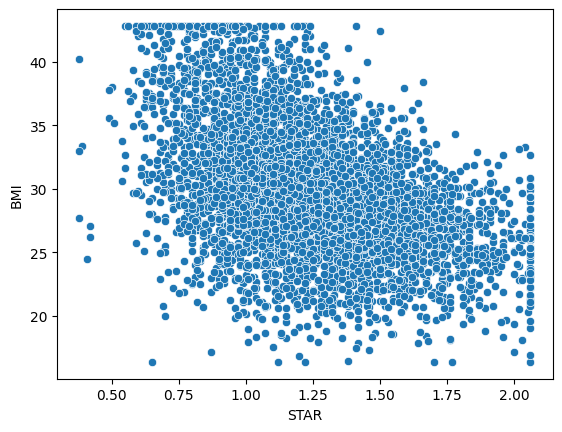

In [ ]:
sns.scatterplot(data=df_lineer, x='STAR', y='BMI')

<Axes: xlabel='Weight', ylabel='BMI'>

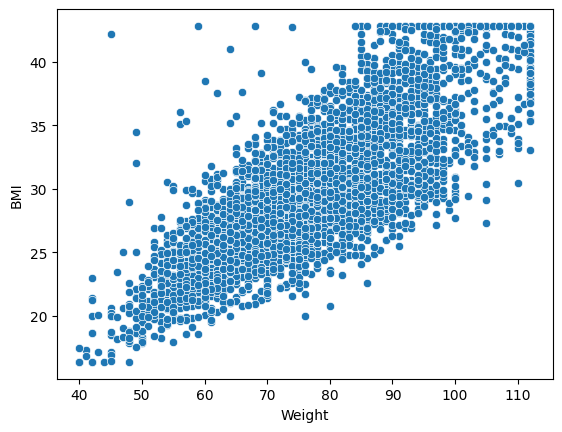

In [ ]:
sns.scatterplot(data=df_lineer, x='Weight', y='BMI')

<Axes: xlabel='Age', ylabel='BMI'>

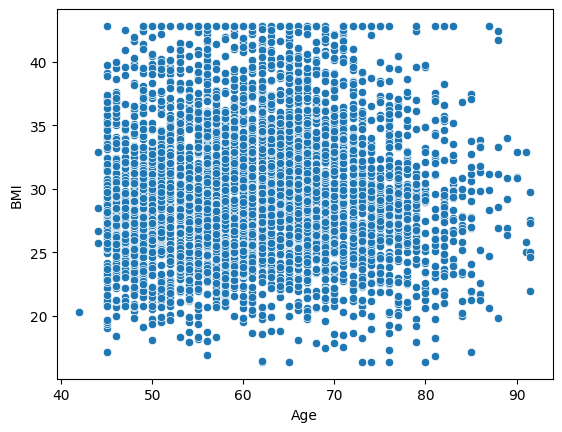

In [ ]:
sns.scatterplot(data=df_lineer, x='Age', y='BMI')

<Axes: xlabel='Gait_Speed', ylabel='BMI'>

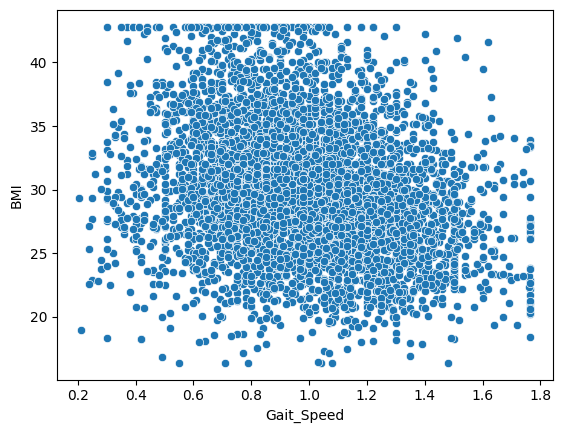

In [ ]:
sns.scatterplot(data=df_lineer, x='Gait_Speed', y='BMI')

<Axes: xlabel='Education_Primary School', ylabel='BMI'>

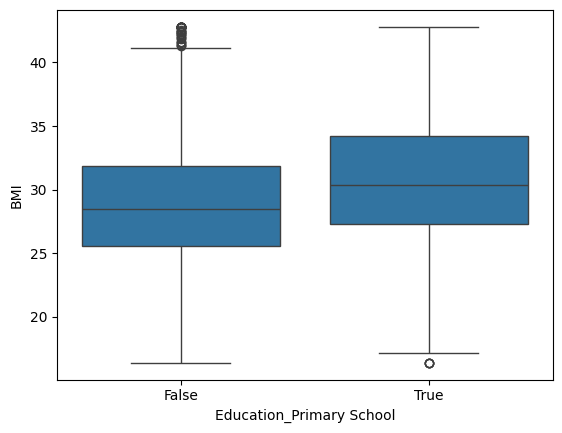

In [ ]:
sns.boxplot(data=df_lineer, x='Education_Primary School', y='BMI')

<Axes: xlabel='Exercise_Status_1-2/week', ylabel='BMI'>

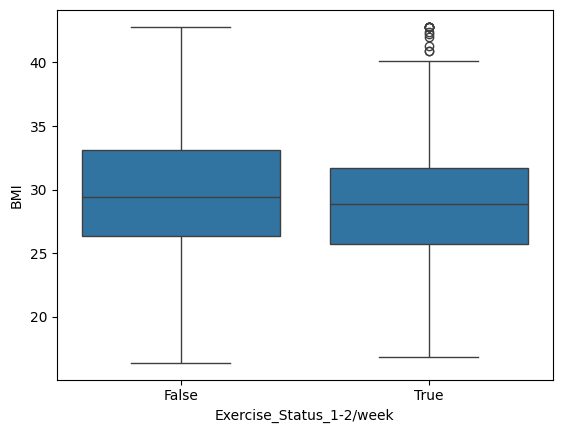

In [ ]:
sns.boxplot(data=df_lineer, x='Exercise_Status_1-2/week', y='BMI')

<Axes: xlabel='Education_Secondary School', ylabel='BMI'>

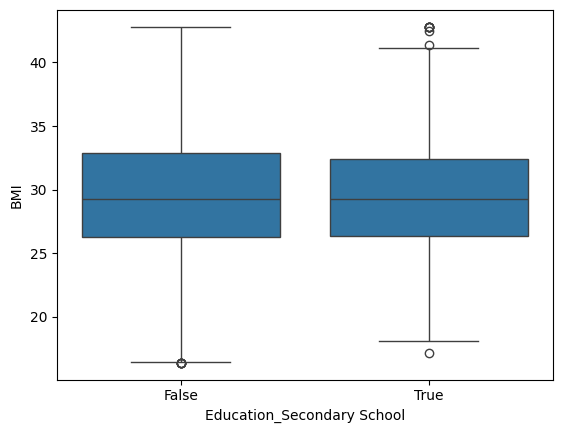

In [ ]:
sns.boxplot(data=df_lineer, x='Education_Secondary School', y='BMI')

**Diagnostic Plots**

In [ ]:
# Get the influence object for easier access to diagnostic metrics
influence = results.get_influence()

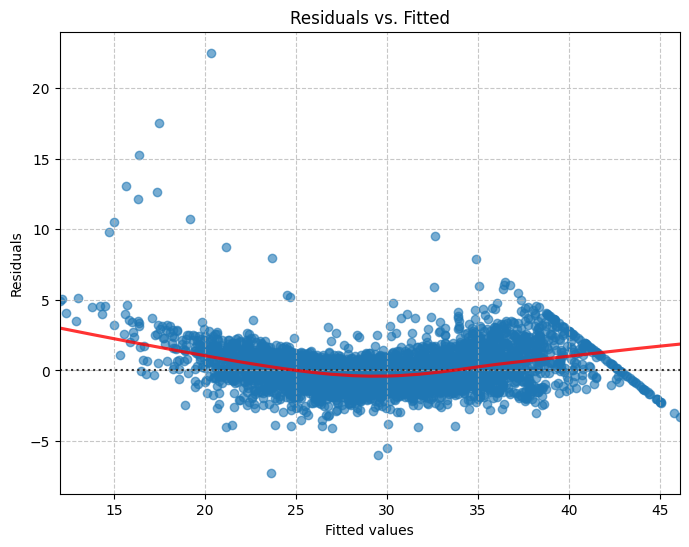

In [ ]:
# Residuals vs. Fitted Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=results.fittedvalues, y=results.resid, lowess=True,
              line_kws={'color': 'red', 'alpha': 0.8}, scatter_kws={'alpha': 0.6})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

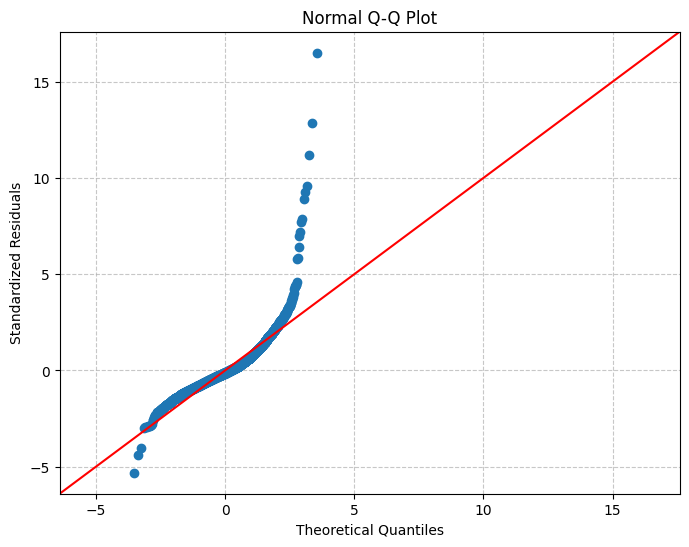

In [ ]:
# Normal Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(results.resid, line='45', fit=True, ax=plt.gca())
plt.title("Normal Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

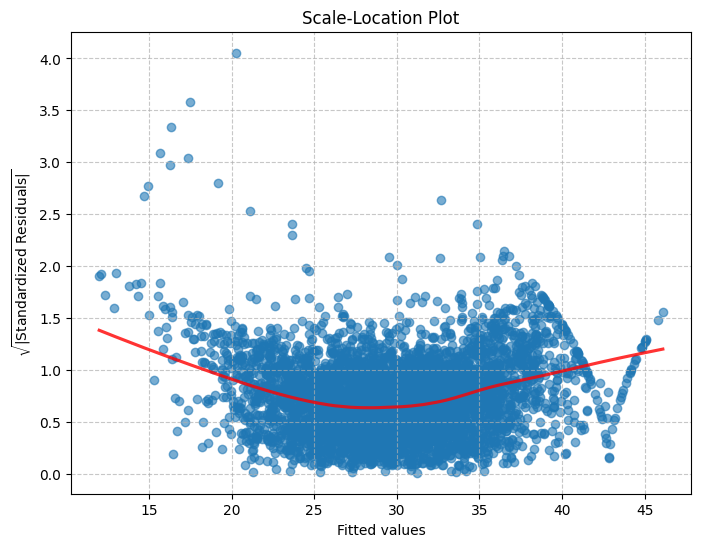

In [ ]:
# Scale-Location Plot
plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, np.sqrt(np.abs(results.resid_pearson)), alpha=0.6)

sns.regplot(x=results.fittedvalues, y=np.sqrt(np.abs(results.resid_pearson)),
            scatter=False, lowess=True, line_kws={'color': 'red', 'alpha': 0.8})
plt.xlabel("Fitted values")
plt.ylabel(r"$\sqrt{|\text{Standardized Residuals}|}$")
plt.title("Scale-Location Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

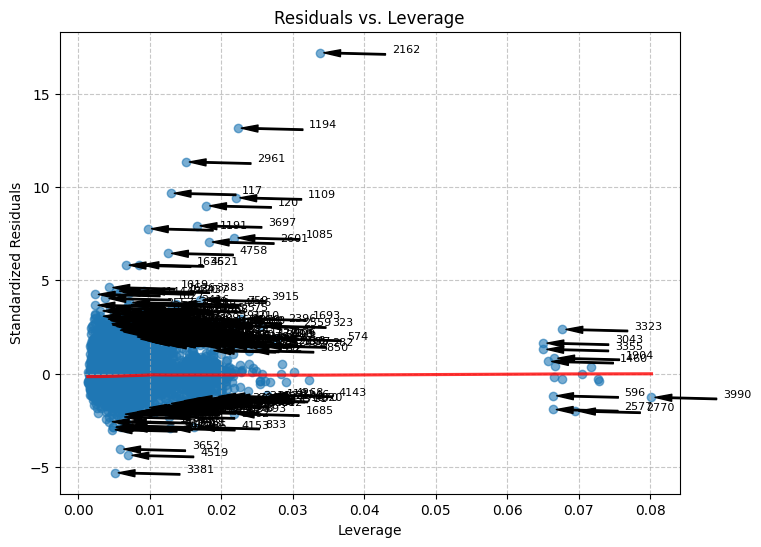

In [ ]:
# Residuals vs. Leverage Plot
plt.figure(figsize=(8, 6))
# Get Cook's Distance and Leverage
cooks_d = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag
standardized_residuals = results.get_influence().resid_studentized_external

plt.scatter(leverage, standardized_residuals, alpha=0.6)
sns.regplot(x=leverage, y=standardized_residuals,
            scatter=False, lowess=True, line_kws={'color': 'red', 'alpha': 0.8})

# Add Cook's distance contours
# You might need to adjust the thresholds based on your data
threshold_cook = 4 / len(df_lineer) # Common rule of thumb: 4/(n-p-1) or 4/n
for i, (l, r, c) in enumerate(zip(leverage, standardized_residuals, cooks_d)):
    if c > threshold_cook:
        plt.annotate(str(i), xy=(l, r), xytext=(l + 0.01, r + 0.01),
                     arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                     fontsize=8)

plt.xlabel("Leverage")
plt.ylabel("Standardized Residuals")
plt.title("Residuals vs. Leverage")
plt.grid(True, linestyle='--', alpha=0.7)

# Add Cook's distance lines (approximate)
# These lines are typically curved. For simplicity, we can plot a few points.
# More accurately, one would calculate the contours properly.
# However, for a basic visualization, just marking points with high Cook's is often enough.

plt.show()

In [ ]:
display(df_lineer.iloc[596])

,596
Age,59.0
Weight,74.0
DM_Type2,0
OP,0
Total_Duration_of_Chronic_Diseases,3.0
AT,25.8
CST,18.0
Gait_Speed,1.17
Grip_Str,28.0
STAR,1.01


In [ ]:
df_lineer.iloc[3323]

,3323
Age,65.0
Weight,98.0
DM_Type2,0
OP,0
Total_Duration_of_Chronic_Diseases,20.0
AT,23.3
CST,12.7
Gait_Speed,0.75
Grip_Str,22.0
STAR,0.61


In [ ]:
df_lineer.iloc[2162]

,2162
Age,66.0
Weight,112.0
DM_Type2,1
OP,1
Total_Duration_of_Chronic_Diseases,5.0
AT,13.1
CST,13.5
Gait_Speed,0.8
Grip_Str,24.0
STAR,1.24


Grafikte sorunlu alanlarda görülen aykırı değerleri çıkartalım.

In [ ]:
df_lineer.drop(index=[2162,3323,3043,3355,1460,1904,2770,3990,3381,2961,117,1109,120,3697,1101,1085], inplace=True)

Regresyon Analizini yeniden yapalım.

In [ ]:
#Split into features and target
X = df_lineer.drop('BMI', axis=1)
y = df_lineer['BMI']

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Evaluate
y_pred = lr_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 1.3414365483785682
R² Score: 0.9492604761079559


**Görüldüğü gibi aykırı değerleri çıkartınca R-2 değeri 1 puan arttı.**

In [ ]:
df.to_excel('/content/drive/MyDrive/PROJECTS/Sarcopenia_Project/Data_Set_Files_2/sarcopenia-data-set_columns_corrected_10.xlsx', index=False)